## Import all necessary libaries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Load Data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train_original=train.copy()
test_original=test.copy()

## Understand Data


In [3]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [4]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB
None


In [5]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [7]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
train.shape

(614, 13)

In [9]:
test.shape

(367, 12)

In [10]:
train['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [11]:
train['Loan_Status'].value_counts(normalize=True) 

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

## Visualizations

<Axes: title={'center': 'Loan Status'}, xlabel='Loan_Status'>

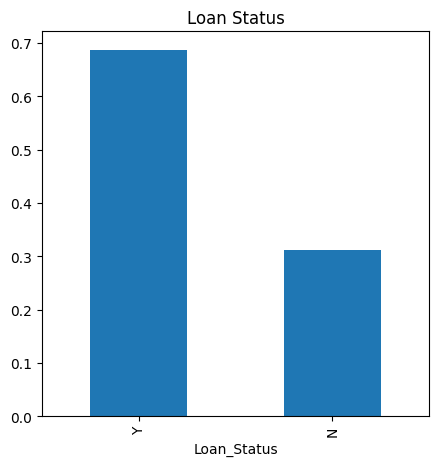

In [12]:
train['Loan_Status'].value_counts(normalize=True).plot.bar(figsize=(5,5),title='Loan Status')

### Univariate Analysis

#### Independent Variable (Categorical):

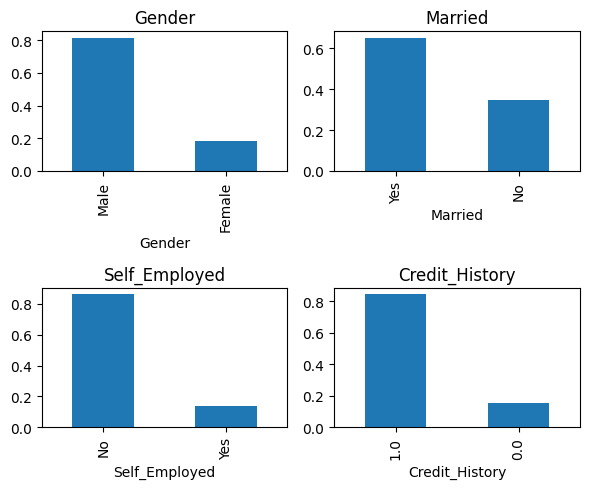

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(6, 5))

train['Gender'].value_counts(normalize=True).plot.bar(ax=axs[0, 0], title='Gender')
train['Married'].value_counts(normalize=True).plot.bar(ax=axs[0, 1], title='Married')
train['Self_Employed'].value_counts(normalize=True).plot.bar(ax=axs[1, 0], title='Self_Employed')
train['Credit_History'].value_counts(normalize=True).plot.bar(ax=axs[1, 1], title='Credit_History')

plt.tight_layout()
plt.show()

#### Independent Variable (Ordinal):

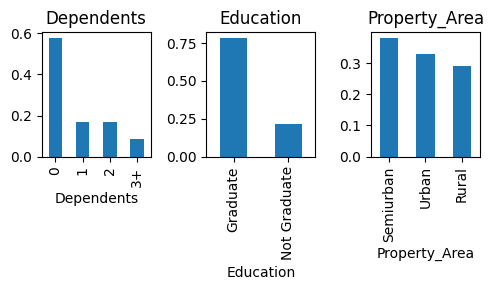

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(5, 3))

train['Dependents'].value_counts(normalize=True).plot.bar(ax=axs[0], title='Dependents')
train['Education'].value_counts(normalize=True).plot.bar(ax=axs[1], title='Education')
train['Property_Area'].value_counts(normalize=True).plot.bar(ax=axs[2], title='Property_Area')

plt.tight_layout()
plt.show()

#### Independent Variable (Numerical):

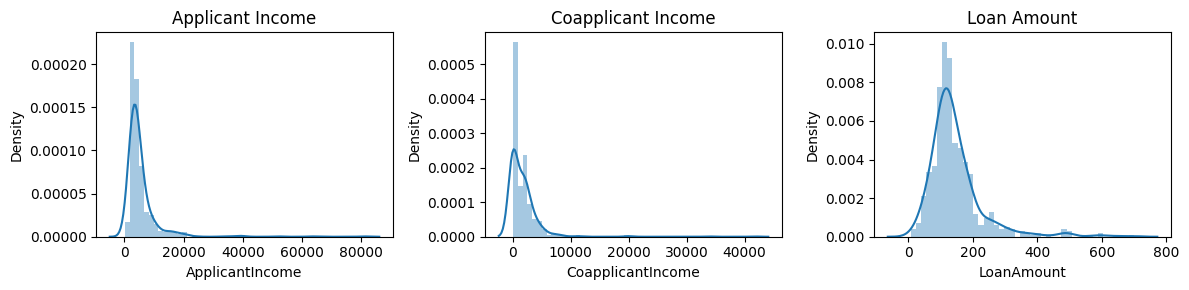

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))

sns.distplot(train['ApplicantIncome'], ax=axs[0])
axs[0].set_title('Applicant Income')

sns.distplot(train['CoapplicantIncome'], ax=axs[1])
axs[1].set_title('Coapplicant Income')

sns.distplot(train['LoanAmount'].dropna(), ax=axs[2])
axs[2].set_title('Loan Amount')

plt.tight_layout()
plt.show()

### Bivariate Analysis

#### Categorical Independent Variable vs Target Variable

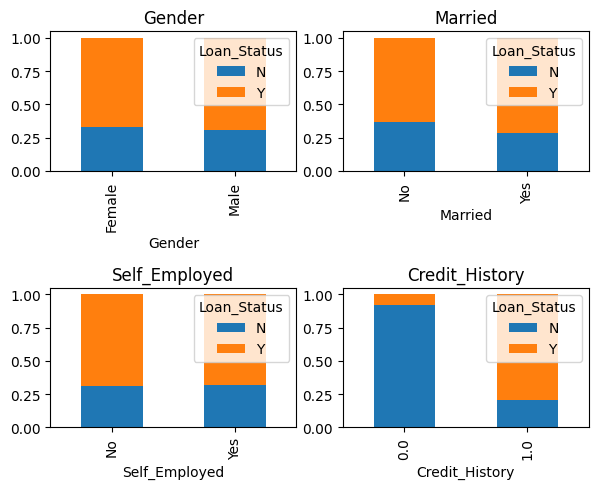

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(6, 5))

Gender = pd.crosstab(train['Gender'], train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=axs[0, 0], title='Gender')

Married = pd.crosstab(train['Married'], train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=axs[0, 1], title='Married')

Self_Employed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=axs[1, 0], title='Self_Employed')

Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=axs[1, 1], title='Credit_History')

plt.tight_layout()
plt.show()


#### Ordinal Independent Variable vs Target Variable

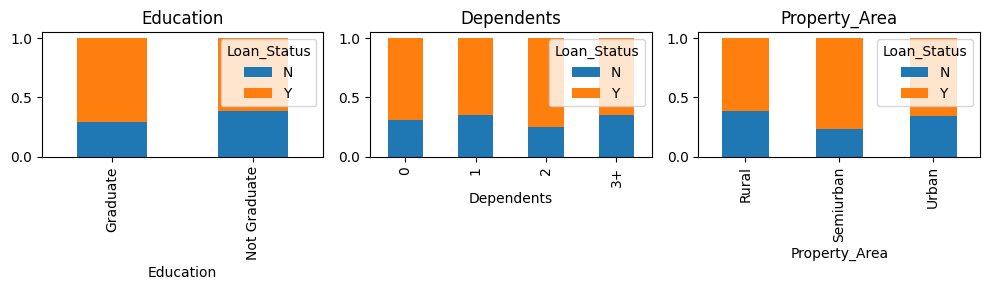

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))

Education = pd.crosstab(train['Education'], train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=axs[0], title='Education')

Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=axs[1], title='Dependents')

Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=axs[2], title='Property_Area')

plt.tight_layout()
plt.show()

#### Numerical Independent Variable vs Target Variable:

<Axes: xlabel='Loan_Status'>

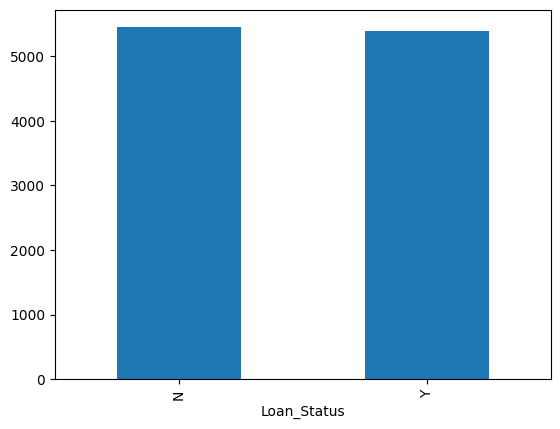

In [18]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

### Making Bins

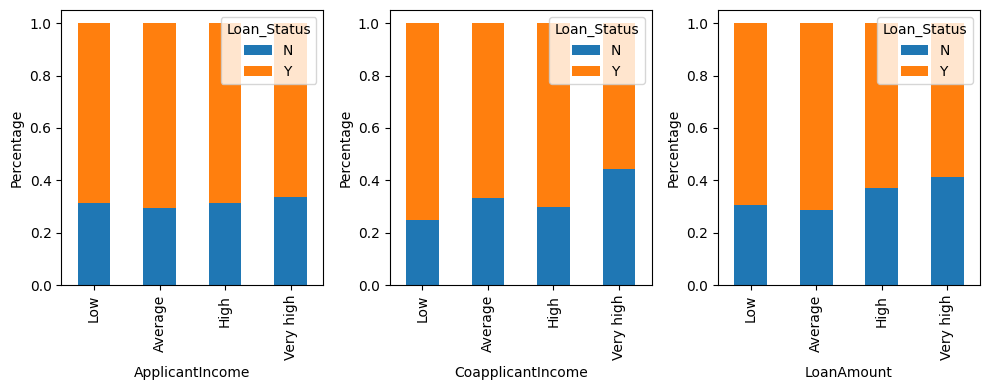

In [19]:
bins_income = [0, 2500, 4000, 6000, 81000]
bins_loan_amount = [0, 100, 200,300, 700]
group = ['Low', 'Average', 'High', 'Very high']

train['Income_bin'] = pd.cut(train['ApplicantIncome'], bins_income, labels=group)
train['CoapplicantIncome_bin'] = pd.cut(train['CoapplicantIncome'], bins_income, labels=group)
train['LoanAmount_bin'] = pd.cut(train['LoanAmount'], bins_loan_amount, labels=group)

fig, axs = plt.subplots(1, 3, figsize=(10, 4))

Income_bin = pd.crosstab(train['Income_bin'], train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=axs[0])
axs[0].set_xlabel('ApplicantIncome')
axs[0].set_ylabel('Percentage')

CoapplicantIncome_bin = pd.crosstab(train['CoapplicantIncome_bin'], train['Loan_Status'])
CoapplicantIncome_bin.div(CoapplicantIncome_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=axs[1])
axs[1].set_xlabel('CoapplicantIncome')
axs[1].set_ylabel('Percentage')

LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'], train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=axs[2])
axs[2].set_xlabel('LoanAmount')
axs[2].set_ylabel('Percentage')

plt.tight_layout()
plt.show()

In [20]:
print(train.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Income_bin', 'CoapplicantIncome_bin', 'LoanAmount_bin'],
      dtype='object')


In [21]:
train = train.drop(['Income_bin', 'CoapplicantIncome_bin', 'LoanAmount_bin'], axis=1)

In [22]:
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

<Axes: >

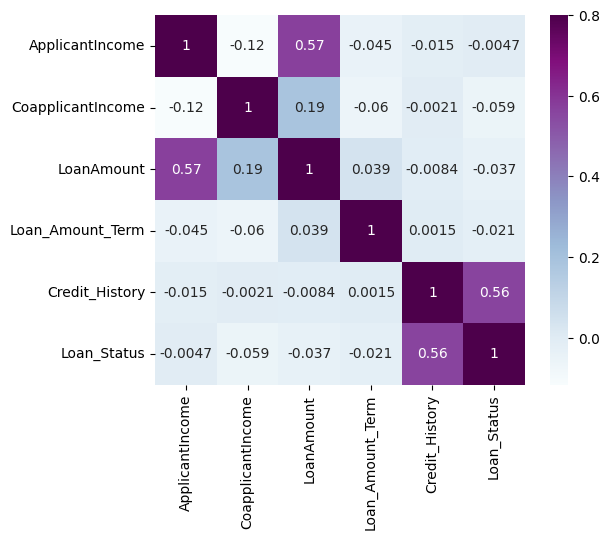

In [23]:
numeric_data = train.select_dtypes(include=['number'])
matrix = numeric_data.corr()
f, ax = plt.subplots()
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

## Unique Value Finding

In [24]:
train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

## Duplicate Finding

In [25]:
duplicates = train.duplicated()
num_duplicates = duplicates.sum()

if num_duplicates == 0:
    print("No duplicates found in the dataset.")
else:
    print(f"Found {num_duplicates} duplicates in the dataset.")

No duplicates found in the dataset.


## Missing Value Handling

In [26]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [28]:
train['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [29]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [30]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [31]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [32]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [33]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Married'].fillna(train['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [34]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

## Outlier Treatment and Feature Engineering

In [35]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [36]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760


In [37]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

In [38]:
train['Total_Income_log'] = np.log(train['Total_Income'])
test['Total_Income_log'] = np.log(test['Total_Income'])

In [39]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income,Total_Income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760,6000.0,8.699515


<Axes: xlabel='Total_Income', ylabel='Density'>

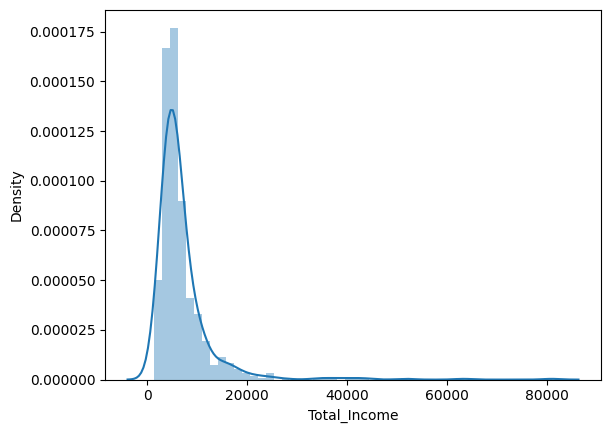

In [40]:
sns.distplot(train['Total_Income'])

<Axes: xlabel='Total_Income_log', ylabel='Density'>

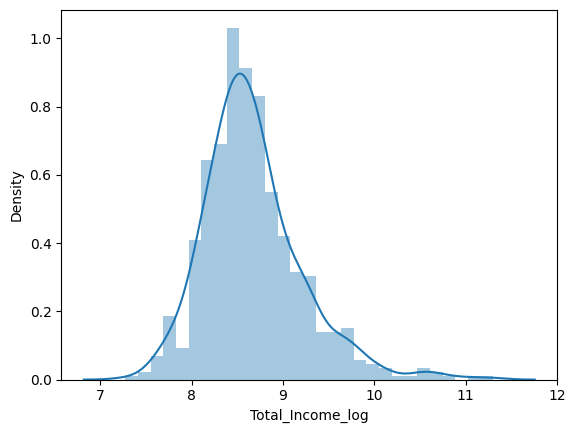

In [41]:
sns.distplot(train['Total_Income_log'])

In [42]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

<Axes: xlabel='EMI', ylabel='Density'>

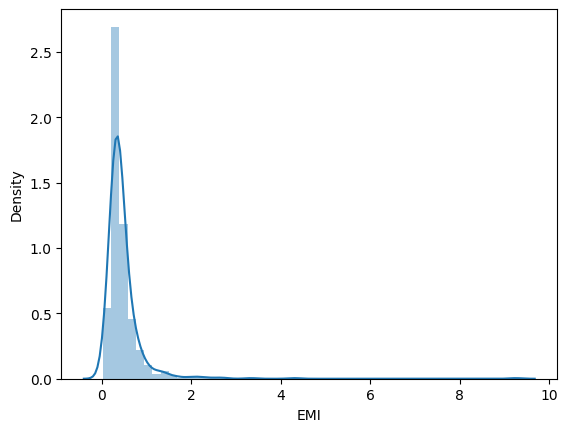

In [43]:
sns.distplot(train['EMI'])

<Axes: xlabel='Balance Income', ylabel='Density'>

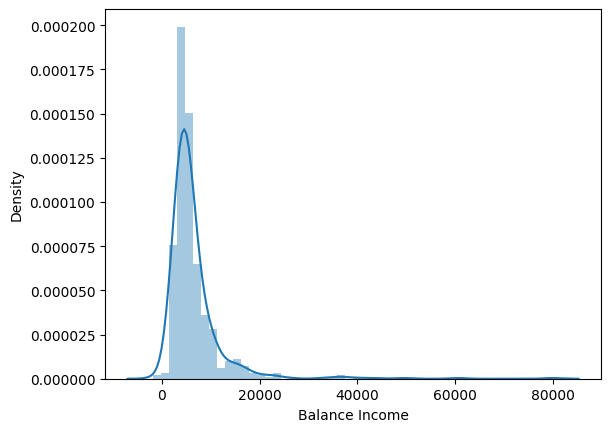

In [44]:
train['Balance Income'] = train['Total_Income']-(train['EMI']*1000)
test['Balance Income'] = test['Total_Income']-(test['EMI']*1000)
sns.distplot(train['Balance Income'])

In [45]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term' , 'Loan_ID'], axis=1)
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term' , 'Loan_ID'], axis=1)

## One hot Encoding

In [46]:
X = train.drop('Loan_Status',axis=1)
y = train.Loan_Status

In [47]:
X = pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [48]:
train.columns

Index(['Credit_History', 'Loan_Status', 'LoanAmount_log', 'Total_Income',
       'Total_Income_log', 'EMI', 'Balance Income', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_3',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

## Logistic Regression

In [49]:
from sklearn.model_selection import train_test_split
x_train_cv, x_test, y_train_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train, x_cv, y_train, y_cv = train_test_split(x_train_cv, y_train_cv, test_size=0.25, random_state=42)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)
LogisticRegression()

LogisticRegression()

In [51]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_cv)

# Calculate the accuracy of the model on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate the accuracy of the model on the test set
test_accuracy = accuracy_score(y_cv, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.8315217391304348
Test Accuracy: 0.7723577235772358


In [52]:
submission = pd.read_csv('test.csv')
submission.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [53]:
pred_test = model.predict(test)

In [54]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [55]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [56]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Output/logistic.csv')

## Logistic Regression using stratified k-folds cross-validation

In [59]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
kf = StratifiedKFold(n_splits=5, random_state=None)
i = 1
mean_cv_accuracy = 0
test_accuracy = []

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    x_train, x_cv = X.iloc[train_index], X.iloc[test_index]
    y_train, y_cv = y.iloc[train_index], y.iloc[test_index]
    model = LogisticRegression()
    model.fit(x_train, y_train)
    pred_cv = model.predict(x_cv)
    cv_accuracy = accuracy_score(y_cv, pred_cv)
    mean_cv_accuracy += cv_accuracy
    print('Validation Accuracy:', cv_accuracy)
    pred_test = model.predict(x_test)
    test_accuracy.append(accuracy_score(y_test, pred_test))
    
    i += 1

# Calculate mean cross-validation accuracy
mean_cv_accuracy /= kf.n_splits
print('\nMean Validation Accuracy:', mean_cv_accuracy)

# Calculate mean test accuracy
mean_test_accuracy = np.mean(test_accuracy)
print('Mean Test Accuracy:', mean_test_accuracy)



1 of kfold 5
Validation Accuracy: 0.6910569105691057

2 of kfold 5
Validation Accuracy: 0.7804878048780488

3 of kfold 5
Validation Accuracy: 0.7804878048780488

4 of kfold 5
Validation Accuracy: 0.6910569105691057

5 of kfold 5
Validation Accuracy: 0.8114754098360656

Mean Validation Accuracy: 0.7509129681460749
Mean Test Accuracy: 0.7252032520325203


In [60]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_cv)

# Calculate the accuracy of the model on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate the accuracy of the model on the test set
test_accuracy = accuracy_score(y_cv, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.8028455284552846
Test Accuracy: 0.8114754098360656


In [61]:
pred_test = model.predict(test)

In [62]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [63]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Output/KFold.csv')

## Decision Tree

In [66]:
from sklearn.tree import DecisionTreeClassifier
kf = StratifiedKFold(n_splits=5, random_state=None)
i = 1
mean_cv_accuracy = 0
test_accuracy = []

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    x_train, x_cv = X.iloc[train_index], X.iloc[test_index]
    y_train, y_cv = y.iloc[train_index], y.iloc[test_index]
    model = DecisionTreeClassifier(random_state=42,min_samples_split = 2,max_depth = 5)
    model.fit(x_train, y_train)
    pred_cv = model.predict(x_cv)
    cv_accuracy = accuracy_score(y_cv, pred_cv)
    mean_cv_accuracy += cv_accuracy
    print('Validation Accuracy:', cv_accuracy)
    pred_test = model.predict(x_test)
    test_accuracy.append(accuracy_score(y_test, pred_test))
    
    i += 1

# Calculate mean cross-validation accuracy
mean_cv_accuracy /= kf.n_splits
print('\nMean Validation Accuracy:', mean_cv_accuracy)

# Calculate mean test accuracy
mean_test_accuracy = np.mean(test_accuracy)
print('Mean Test Accuracy:', mean_test_accuracy)


1 of kfold 5
Validation Accuracy: 0.7723577235772358

2 of kfold 5
Validation Accuracy: 0.7479674796747967

3 of kfold 5
Validation Accuracy: 0.7886178861788617

4 of kfold 5
Validation Accuracy: 0.8211382113821138

5 of kfold 5
Validation Accuracy: 0.7950819672131147

Mean Validation Accuracy: 0.7850326536052246
Mean Test Accuracy: 0.8130081300813007


In [67]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_cv)

# Calculate the accuracy of the model on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate the accuracy of the model on the test set
test_accuracy = accuracy_score(y_cv, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.8292682926829268
Test Accuracy: 0.7950819672131147


In [68]:
pred_test = model.predict(test)

In [69]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [70]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Output/DecisionTree.csv')

## Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier
kf = StratifiedKFold(n_splits=5, random_state=None)
i = 1
mean_cv_accuracy = 0
test_accuracy = []

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    x_train, x_cv = X.iloc[train_index], X.iloc[test_index]
    y_train, y_cv = y.iloc[train_index], y.iloc[test_index]
    model = RandomForestClassifier(random_state=42,max_depth=3,n_estimators=25)
    model.fit(x_train, y_train)
    pred_cv = model.predict(x_cv)
    cv_accuracy = accuracy_score(y_cv, pred_cv)
    mean_cv_accuracy += cv_accuracy
    print('Validation Accuracy:', cv_accuracy)
    pred_test = model.predict(x_test)
    test_accuracy.append(accuracy_score(y_test, pred_test))
    
    i += 1

# Calculate mean cross-validation accuracy
mean_cv_accuracy /= kf.n_splits
print('\nMean Validation Accuracy:', mean_cv_accuracy)

# Calculate mean test accuracy
mean_test_accuracy = np.mean(test_accuracy)
print('Mean Test Accuracy:', mean_test_accuracy)


1 of kfold 5
Validation Accuracy: 0.7967479674796748

2 of kfold 5
Validation Accuracy: 0.7723577235772358

3 of kfold 5
Validation Accuracy: 0.7886178861788617

4 of kfold 5
Validation Accuracy: 0.8373983739837398

5 of kfold 5
Validation Accuracy: 0.819672131147541

Mean Validation Accuracy: 0.8029588164734106
Mean Test Accuracy: 0.7967479674796747


In [74]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_cv)

# Calculate the accuracy of the model on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate the accuracy of the model on the test set
test_accuracy = accuracy_score(y_cv, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.8211382113821138
Test Accuracy: 0.819672131147541


In [75]:
pred_test = model.predict(test)

In [76]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [77]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Output/RandomForest.csv')

## XG BOOST

In [80]:
import xgboost as xgb
import numpy as np

n_splits = 5
kf = StratifiedKFold(n_splits=n_splits, random_state=None)
i = 1
mean_cv_accuracy = 0
test_accuracy = []

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, n_splits))
    x_train, x_cv = X.iloc[train_index], X.iloc[test_index]
    y_train, y_cv = y.iloc[train_index], y.iloc[test_index]
    model = xgb.XGBClassifier(max_depth=3,min_child_weight=5,learning_rate=0.01,colsample_bytree=0.8,subsample=0.8)
    model.fit(x_train, y_train)
    pred_cv = model.predict(x_cv)
    cv_accuracy = accuracy_score(y_cv, pred_cv)
    mean_cv_accuracy += cv_accuracy
    print('Validation Accuracy:', cv_accuracy)
    pred_test = model.predict(x_test)
    test_accuracy.append(accuracy_score(y_test, pred_test))
    
    i += 1

# Calculate mean cross-validation accuracy
mean_cv_accuracy /= n_splits
print('\nMean Validation Accuracy:', mean_cv_accuracy)

# Calculate mean test accuracy
mean_test_accuracy = np.mean(test_accuracy)
print('Mean Test Accuracy:', mean_test_accuracy)



1 of kfold 5
Validation Accuracy: 0.8130081300813008

2 of kfold 5
Validation Accuracy: 0.7804878048780488

3 of kfold 5
Validation Accuracy: 0.7804878048780488

4 of kfold 5
Validation Accuracy: 0.8536585365853658

5 of kfold 5
Validation Accuracy: 0.819672131147541

Mean Validation Accuracy: 0.809462881514061
Mean Test Accuracy: 0.7886178861788617


In [81]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_cv)

# Calculate the accuracy of the model on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate the accuracy of the model on the test set
test_accuracy = accuracy_score(y_cv, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.806910569105691
Test Accuracy: 0.819672131147541


In [82]:
pred_test = model.predict(test)

In [83]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [84]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Output/XGBoost.csv')

## AUC-ROC Curve

### Logistic Regression

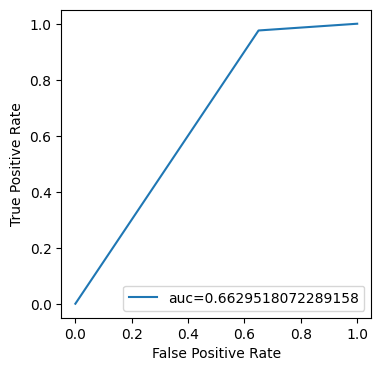

In [57]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_cv, y_test_pred)
auc = metrics.roc_auc_score(y_cv, y_test_pred)
plt.figure(figsize=(4,4))
plt.plot(fpr, tpr, label="auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

### Logistic Regression using stratified k-folds cross-validation

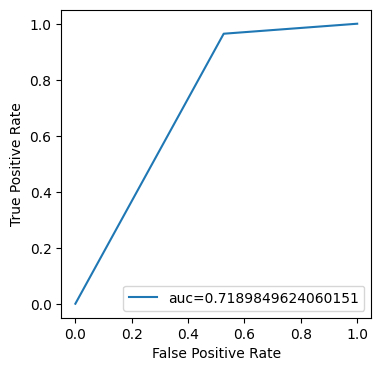

In [64]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = metrics.roc_curve(y_cv, y_test_pred)
auc = metrics.roc_auc_score(y_cv, y_test_pred)
plt.figure(figsize=(4,4))
plt.plot(fpr, tpr, label="auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

### Decision Tree

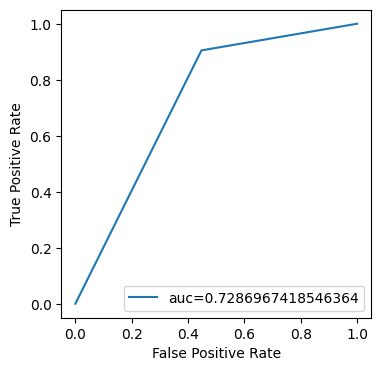

In [71]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_cv, y_test_pred)
auc = metrics.roc_auc_score(y_cv, y_test_pred)
plt.figure(figsize=(4,4))
plt.plot(fpr, tpr, label="auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

### Random Forest

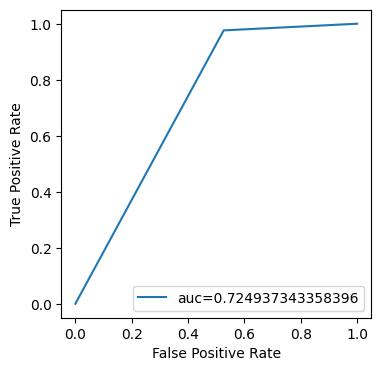

In [78]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_cv, y_test_pred)
auc = metrics.roc_auc_score(y_cv, y_test_pred)
plt.figure(figsize=(4,4))
plt.plot(fpr, tpr, label="auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

### XG Boost

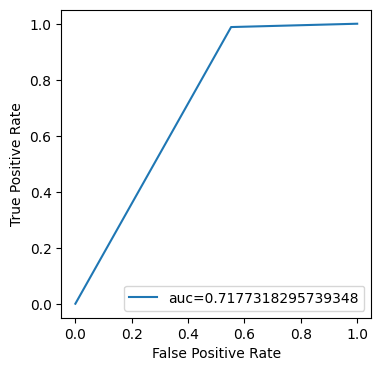

In [85]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_cv, y_test_pred)
auc = metrics.roc_auc_score(y_cv, y_test_pred)
plt.figure(figsize=(4,4))
plt.plot(fpr, tpr, label="auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

## Matrix Calculation

### Logistic Regression

In [58]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_cv, y_test_pred)
precision = precision_score(y_cv, y_test_pred)
recall = recall_score(y_cv, y_test_pred)
f1 = f1_score(y_cv, y_test_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
conf_matrix = confusion_matrix(y_cv, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7723577235772358
Precision: 0.7570093457943925
Recall: 0.9759036144578314
F1 Score: 0.8526315789473685
Confusion Matrix:
[[14 26]
 [ 2 81]]


In [65]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_cv, y_test_pred)
precision = precision_score(y_cv, y_test_pred)
recall = recall_score(y_cv, y_test_pred)
f1 = f1_score(y_cv, y_test_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
conf_matrix = confusion_matrix(y_cv, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8114754098360656
Precision: 0.801980198019802
Recall: 0.9642857142857143
F1 Score: 0.8756756756756758
Confusion Matrix:
[[18 20]
 [ 3 81]]


### Decision Tree

In [72]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_cv, y_test_pred)
precision = precision_score(y_cv, y_test_pred)
recall = recall_score(y_cv, y_test_pred)
f1 = f1_score(y_cv, y_test_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
conf_matrix = confusion_matrix(y_cv, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7950819672131147
Precision: 0.8172043010752689
Recall: 0.9047619047619048
F1 Score: 0.8587570621468926
Confusion Matrix:
[[21 17]
 [ 8 76]]


### Random Forest

In [79]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_cv, y_test_pred)
precision = precision_score(y_cv, y_test_pred)
recall = recall_score(y_cv, y_test_pred)
f1 = f1_score(y_cv, y_test_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
conf_matrix = confusion_matrix(y_cv, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.819672131147541
Precision: 0.803921568627451
Recall: 0.9761904761904762
F1 Score: 0.8817204301075269
Confusion Matrix:
[[18 20]
 [ 2 82]]


### XGBoost

In [86]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_cv, y_test_pred)
precision = precision_score(y_cv, y_test_pred)
recall = recall_score(y_cv, y_test_pred)
f1 = f1_score(y_cv, y_test_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
conf_matrix = confusion_matrix(y_cv, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.819672131147541
Precision: 0.7980769230769231
Recall: 0.9880952380952381
F1 Score: 0.8829787234042553
Confusion Matrix:
[[17 21]
 [ 1 83]]
